In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv

In [2]:
bdata = read_csv("data.csv", sep=",",)
bdata.head() #take a look at the data

,EA,EB,EC,SP
0,10.00,6.2,NaN,21.0
1,19.67,NaN,NaN,NaN
2,9.67,14.6,13.0,33.0
3,NaN,NaN,48.3,13.0
4,16.00,36.6,NaN,3.0


In [3]:
bdata.loc[ (bdata.SP <= 20) & (bdata['EA'] >= 55.0) ]

,EA,EB,EC,SP
9,71.00,NaN,7.0,11.0
12,65.50,18.0,NaN,6.0
14,62.40,23.6,NaN,18.0
16,56.67,36.0,6.2,18.0


In [4]:
print(bdata.isnull().sum())
print(bdata.isna().sum())

EA    3
EB    4
EC    9
SP    1
dtype: int64
EA    3
EB    4
EC    9
SP    1
dtype: int64


In [5]:
# Replacing NaN's with 0's
bdata.fillna(0, inplace=True)
bdata.head()

,EA,EB,EC,SP
0,10.00,6.2,0.0,21.0
1,19.67,0.0,0.0,0.0
2,9.67,14.6,13.0,33.0
3,0.00,0.0,48.3,13.0
4,16.00,36.6,0.0,3.0


In [6]:
# Simple feature statistics
pd.set_option('precision', 2)
bdata.describe()

OptionError: 'Pattern matched multiple keys'

In [ ]:
# What type is the data?
bdata.dtypes

In [ ]:
# type conversion of all columns - not really needed here
bdata.astype('float64', copy=False)

In [ ]:
# Distributions (histograms)
bdata.hist(bins=20,figsize=(12,10),grid=False);

c:\users\jelmer\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jelmer\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jelmer\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

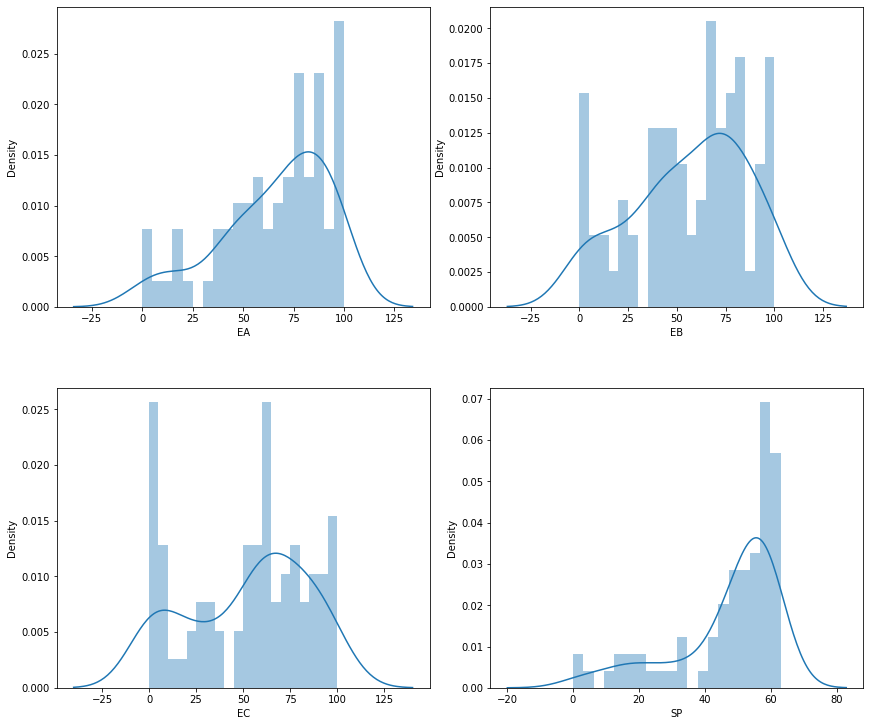

In [7]:
# using seaborn for distributions
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))
index = 0
axs = axs.flatten()
for k, v in bdata.items():
    sns.distplot(v, ax=axs[index], bins=20)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [8]:
#Skewness
bdata.skew()

EA   -0.833759
EB   -0.402386
EC   -0.364709
SP   -1.455776
dtype: float64

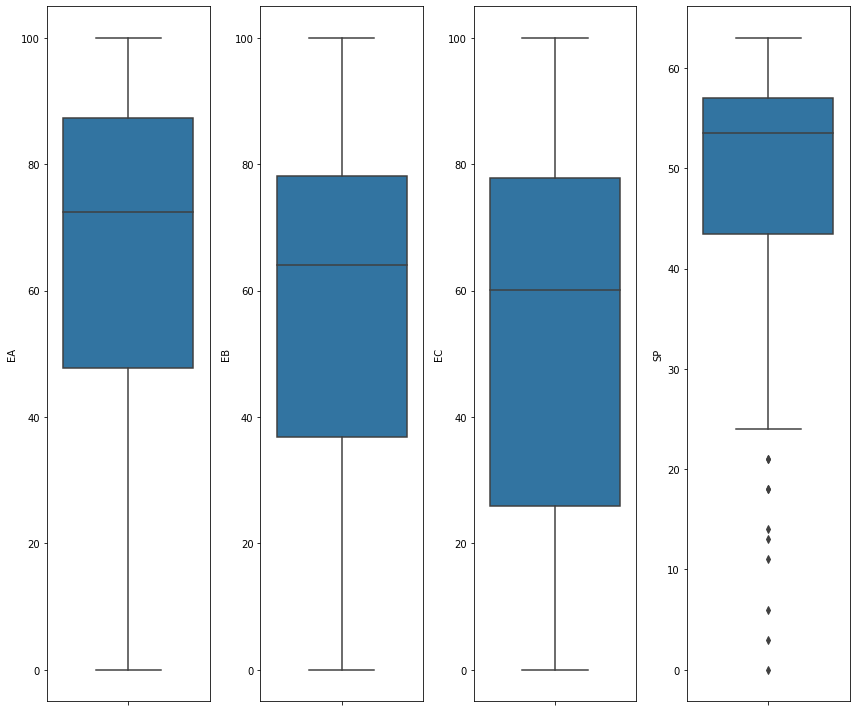

In [9]:
# Boxplots
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(12, 10))
index = 0
axs = axs.flatten()
for k, v in bdata.items():
    sns.boxplot(y=k, data=bdata, ax=axs[index])
    index += 1
plt.tight_layout()

In [10]:
# Correlations
pd.set_option('precision', 2)
bdata.corr(method='pearson')

OptionError: 'Pattern matched multiple keys'

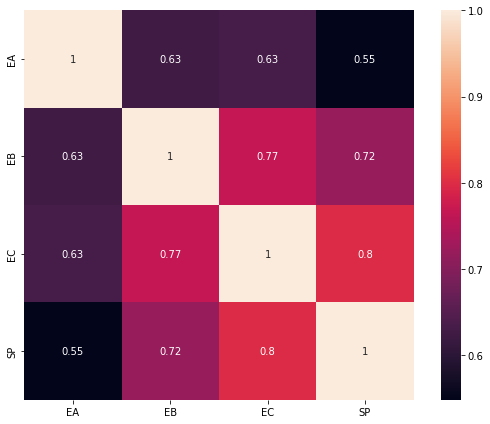

In [11]:
# Correlations using seaborn's heatmap
corr = bdata.corr().abs()
plt.figure(figsize = (8, 6))
sns.heatmap(corr, square=True, annot=True)
plt.tight_layout()

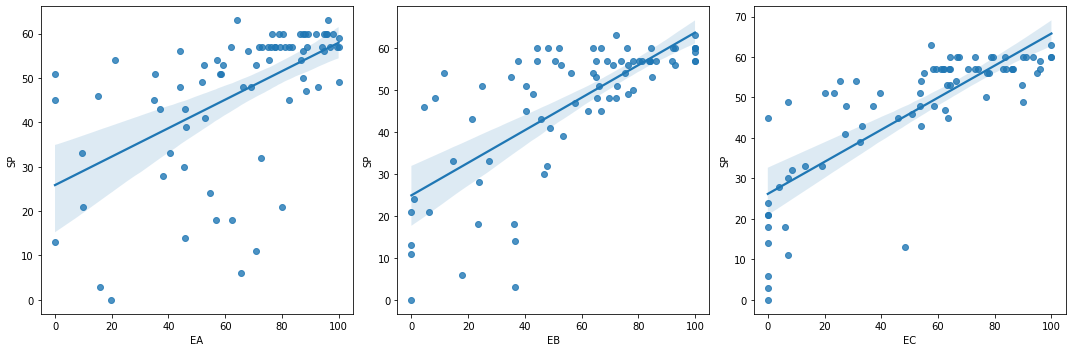

In [12]:
# Regression curves
from sklearn import preprocessing
column_sels = ['EA', 'EB', 'EC']
x = (bdata.loc[:,column_sels])
y = (bdata['SP'])
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout()

### Linear Regression and Learning Curves

If you look at the data above you will notice that the features have different scales, to use the regression models you'll need to build a pipeline that uses scaling of the features:

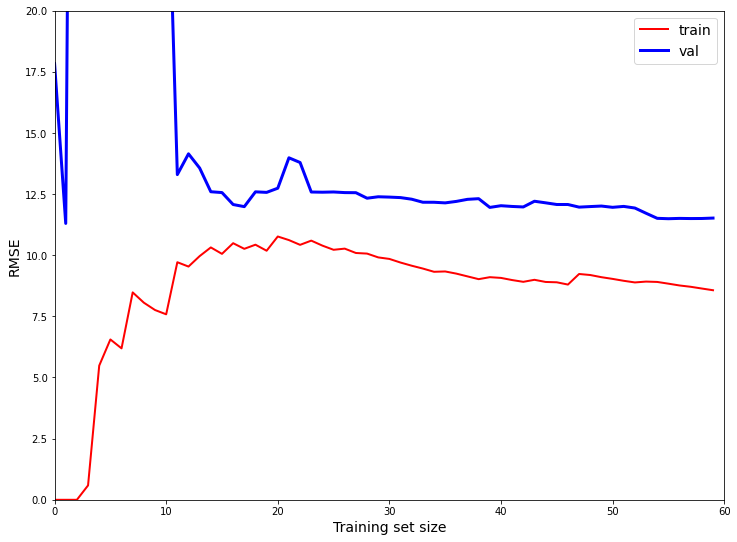

8.567171561463994 11.516724244214725


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

std_scaler = StandardScaler()
lin_reg = LinearRegression()
regressor = Pipeline([
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg),
])

X = bdata[['EA', 'EB', 'EC']]
y = bdata['SP']

# Learning curves function
# Note that it scales the plot for this particular problem (plt.axis([0, 60, 0, 20]))
def learning_curves(regressor, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=55)

    train_errors, val_errors = [], []
    for m in range(2, len(X_train)):
        regressor.fit(X_train[:m], y_train[:m])
        y_train_predict = regressor.predict(X_train[:m])
        y_val_predict = regressor.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.figure(figsize=(12,9))
    plt.plot(np.sqrt(train_errors), "r-", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    plt.axis([0, 60, 0, 20])
    plt.show() 
    print(np.sqrt(train_errors)[-1], np.sqrt(val_errors)[-1])
    return X_train, y_train

X_train, y_train = learning_curves(regressor, X, y)


In [14]:
#K-fold cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

def kcross(regressor, X, y):
    kf = KFold(n_splits=5)
    scores = cross_val_score(regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
    return scores.mean(), scores.std()

mean, std = kcross(regressor, X, y)
print(f"MSE: mean={-mean:.2f} std={std:.2f}")

MSE: mean=174.35 std=168.81


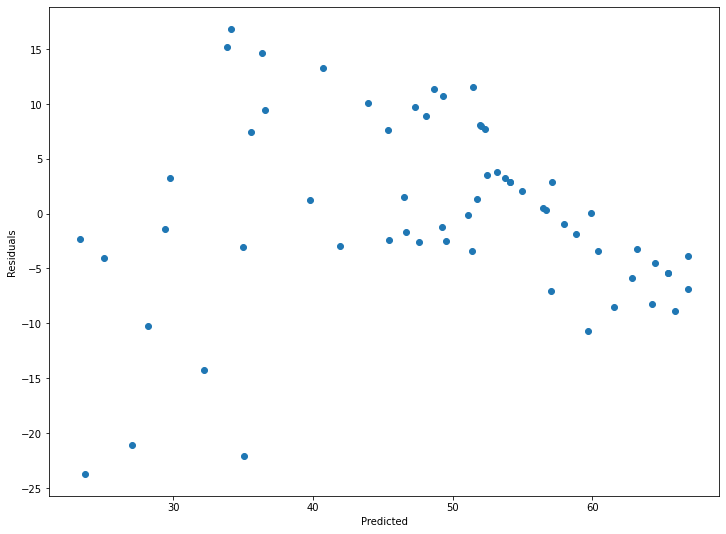

In [15]:
# Checking residuals
def res_plot(regressor, X_train, y_train):
    y_train_predict = regressor.predict(X_train)
    plt.figure(figsize=(12,9))
    plt.scatter(y_train_predict, y_train-y_train_predict)
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.show()

res_plot(regressor, X_train, y_train)

**What to do next?**

* Remove some features
* Use the average
* Add polynomial features
* Take a logarithm
* Use regularization